In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling.visualisation.plot import timeseries_heatmap
from statsmodels.tsa.seasonal import seasonal_decompose


In [507]:
# Read the data from the CSV file and create a dataframe
df = pd.read_csv('datasets/Building_Base_Cooling.csv')
df

C:\Users\sdeko\AppData\Local\Temp\ipykernel_11900\1571363055.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/Building_Base_Cooling.csv')


,TIMESTAMP,T_Stair_101,T_Room_102,T_Room_103,T_Room_104,T_Room_105,T_Room_106,T_Stair_201,T_Room_202,T_Room_203,...,AF_VAV_102,AF_VAV_103,AF_VAV_104,AF_VAV_105,AF_VAV_106,AF_VAV_202,AF_VAV_203,AF_VAV_204,AF_VAV_205,AF_VAV_206
0,Unit,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,...,m3/s,m3/s,m3/s,m3/s,m3/s,m3/s,m3/s,m3/s,m3/s,m3/s
1,7/8/2021 0:00,24.12777778,20.85555556,20.95555556,20.90555556,20.92777778,20.92222222,25.16111111,20.99444444,20.93333333,...,0.054012212,0.066047267,0.14927482,0.164370045,0.144674413,0.084564938,0.071332605,0.163082198,0.134662473,0.15077318
2,7/8/2021 0:01,24.12777778,20.88888889,20.91666667,20.94444444,20.95,20.95,25.15555556,20.98333333,21.03888889,...,0.054182164,0.065846765,0.148246977,0.16313794,0.144730108,0.084229076,0.071792312,0.163800452,0.13658811,0.148476102
3,7/8/2021 0:02,24.11666667,20.88333333,20.89444444,20.98333333,20.96111111,20.94444444,25.14444444,20.96666667,21.05555556,...,0.054001966,0.065559783,0.14893454,0.163590221,0.144513673,0.084294218,0.071913196,0.163695501,0.135801988,0.149739462
4,7/8/2021 0:03,24.11111111,20.92777778,20.89444444,20.99444444,20.99444444,20.95555556,25.13888889,20.96666667,21.01666667,...,0.054306573,0.065857763,0.147553774,0.165590118,0.144526081,0.084765581,0.073009142,0.166611757,0.136569733,0.151312129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,7/14/2021 23:55,23.833333,21.061111,21.05,21.027778,21.072222,21.038889,25.227778,20.916667,20.872222,...,0.054936,0.067265,0.15103,0.168205,0.144975,0.084162,0.071108,0.165927,0.136399,0.152856
10077,7/14/2021 23:56,23.827778,21.0,20.988889,20.988889,21.005556,21.005556,25.222222,20.961111,20.827778,...,0.054989,0.067335,0.150553,0.167388,0.145272,0.084227,0.071456,0.165078,0.135186,0.152466
10078,7/14/2021 23:57,23.822222,20.933333,20.983333,20.988889,20.988889,20.955556,25.216667,20.972222,20.894444,...,0.054825,0.066847,0.151327,0.16844,0.145668,0.084297,0.071057,0.164001,0.136653,0.15093
10079,7/14/2021 23:58,23.827778,20.905556,20.944444,20.938889,20.927778,20.905556,25.211111,20.966667,21.005556,...,0.054412,0.066717,0.150256,0.165815,0.145439,0.084227,0.07134,0.163865,0.13482,0.151246


In [508]:
# Check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 76 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TIMESTAMP       10081 non-null  object
 1   T_Stair_101     10081 non-null  object
 2   T_Room_102      10081 non-null  object
 3   T_Room_103      10081 non-null  object
 4   T_Room_104      10081 non-null  object
 5   T_Room_105      10081 non-null  object
 6   T_Room_106      10081 non-null  object
 7   T_Stair_201     10081 non-null  object
 8   T_Room_202      10081 non-null  object
 9   T_Room_203      10081 non-null  object
 10  T_Room_204      10081 non-null  object
 11  T_Room_205      10081 non-null  object
 12  T_Room_206      10081 non-null  object
 13  RH_Stair_101    10081 non-null  object
 14  RH_Room_102     10081 non-null  object
 15  RH_Room_103     10081 non-null  object
 16  RH_Room_104     10081 non-null  object
 17  RH_Room_105     10081 non-null  object
 18  RH_Roo

In [509]:
# Check some statistics about the columns
df.describe()

,TIMESTAMP,T_Stair_101,T_Room_102,T_Room_103,T_Room_104,T_Room_105,T_Room_106,T_Stair_201,T_Room_202,T_Room_203,...,AF_VAV_102,AF_VAV_103,AF_VAV_104,AF_VAV_105,AF_VAV_106,AF_VAV_202,AF_VAV_203,AF_VAV_204,AF_VAV_205,AF_VAV_206
count,10081,10081,10081,10081,10081,10081,10081,10081,10081,10081,...,10081,10081,10081,10081,10081,10081,10081,10081,10081,10081
unique,10081,1346,144,117,709,806,376,1230,158,220,...,7434,7931,9236,9438,8990,7852,8613,9381,9444,9203
top,Unit,26.77777778,21.00555556,21.00555556,20.96111111,21.02222222,20.98888889,28.16666667,20.98888889,20.97222222,...,0.054992726,0.066389098,0.150555899,0.165825353,0.144828808,0.084233682,0.071978103,0.165699205,0.136029844,0.151775737
freq,1,112,338,331,308,172,266,95,380,189,...,8,8,5,4,5,9,6,4,4,4


In [510]:
# Count the null values of each column
df.isna().sum()

TIMESTAMP      0
T_Stair_101    0
T_Room_102     0
T_Room_103     0
T_Room_104     0
              ..
AF_VAV_202     0
AF_VAV_203     0
AF_VAV_204     0
AF_VAV_205     0
AF_VAV_206     0
Length: 76, dtype: int64

In [511]:
# Delete the first row
second_row = df.iloc[0]

new_columns = []
for i in range(len(df.columns)):
    new_columns.append(df.columns[i] + '_' + str(second_row[i]))

# Change data types to datetime and float
df.columns = new_columns
df = df.drop(df.index[0])
df = df.rename(columns={df.columns[0]: 'timestamp'})
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M')
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)
df.dtypes

C:\Users\sdeko\AppData\Local\Temp\ipykernel_11900\3167629961.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)


timestamp            datetime64[ns]
T_Stair_101_Deg C           float64
T_Room_102_Deg C            float64
T_Room_103_Deg C            float64
T_Room_104_Deg C            float64
                          ...      
AF_VAV_202_m3/s             float64
AF_VAV_203_m3/s             float64
AF_VAV_204_m3/s             float64
AF_VAV_205_m3/s             float64
AF_VAV_206_m3/s             float64
Length: 76, dtype: object

In [512]:
# Calculate mean, median, std dev, and quartiles for each column
columns = df.columns[1:]
for column in columns:
    print('Column:', column)
    print('Mean:', df[column].mean())
    print('Median:', df[column].median())
    print('Standard deviation:', df[column].std())
    print('25th percentile:', df[column].quantile(0.25))
    print('75th percentile:', df[column].quantile(0.75))
    print('\n')

Column: T_Stair_101_Deg C
Mean: 24.821548170159723
Median: 24.35555556
Standard deviation: 1.43957782702543
25th percentile: 23.63888889
75th percentile: 25.92777778


Column: T_Room_102_Deg C
Mean: 21.000120701052577
Median: 21.0
Standard deviation: 0.07924401568579856
25th percentile: 20.95
75th percentile: 21.04444444


Column: T_Room_103_Deg C
Mean: 21.000914903005953
Median: 21.0
Standard deviation: 0.05896917914306436
25th percentile: 20.96111111
75th percentile: 21.03888889


Column: T_Room_104_Deg C
Mean: 21.13306602734921
Median: 20.99444444
Standard deviation: 0.4258786498128082
25th percentile: 20.95555556
75th percentile: 21.1


Column: T_Room_105_Deg C
Mean: 21.205339506165675
Median: 21.03888889
Standard deviation: 0.5181569084365523
25th percentile: 20.95555556
75th percentile: 21.13888889


Column: T_Room_106_Deg C
Mean: 21.065779872148806
Median: 21.01111111
Standard deviation: 0.1833883213164022
25th percentile: 20.96666667
75th percentile: 21.08333333


Column: T_Sta

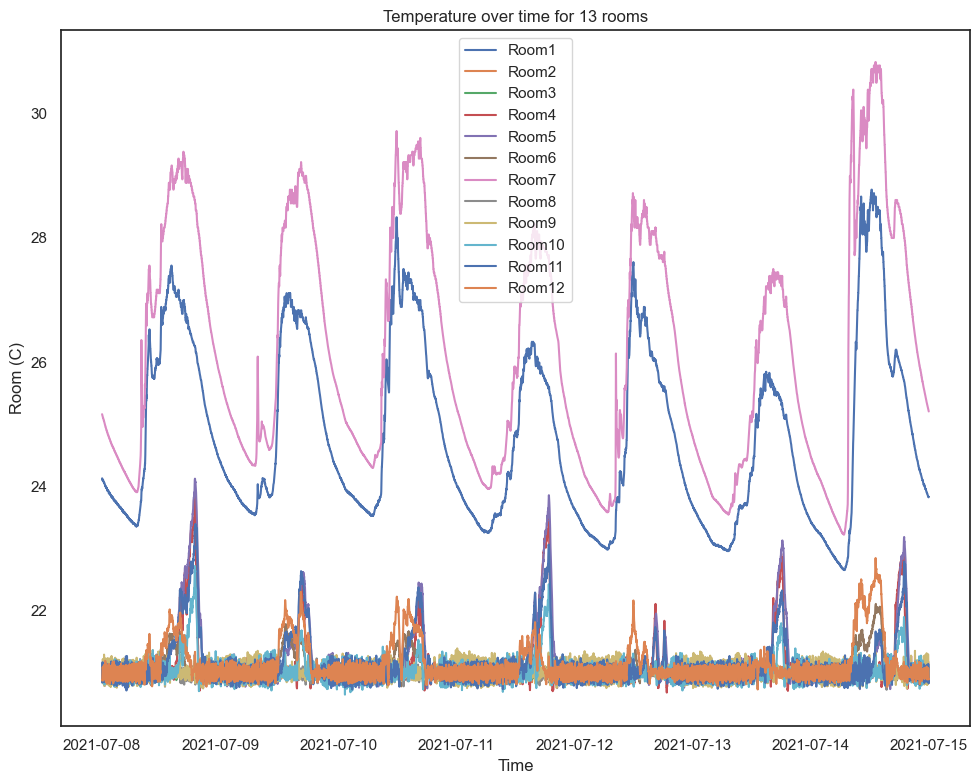

In [513]:
# Lineplot the temperature for each room over time
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for x in range(1, 13):
    ax.plot(df.iloc[:, 0], df.iloc[:, x], label=f'Room{x}')

ax.set_xlabel('Time')
ax.set_ylabel('Room (C)')
ax.set_title('Temperature over time for 13 rooms')

ax.legend()

plt.tight_layout()
plt.show()

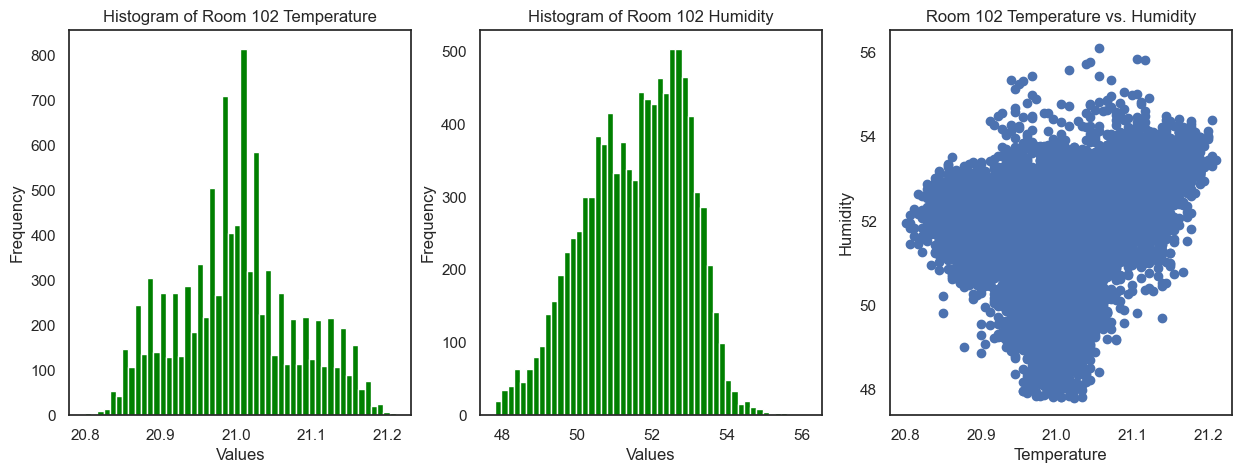

In [514]:
# Plot histograms and scatterplot for room 102

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# temperature
axs[0].hist(df.iloc[:, 2], bins=50, color='green')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Room 102 Temperature')
# humidity
axs[1].hist(df.iloc[:, 15], bins=50, color='green')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Room 102 Humidity')
# scatterplot
temp_col = df.iloc[:, 2]
humidity_col = df.iloc[:, 15]
axs[2].scatter(temp_col, humidity_col)
axs[2].set_xlabel('Temperature')
axs[2].set_ylabel('Humidity')
axs[2].set_title('Room 102 Temperature vs. Humidity')

plt.show()

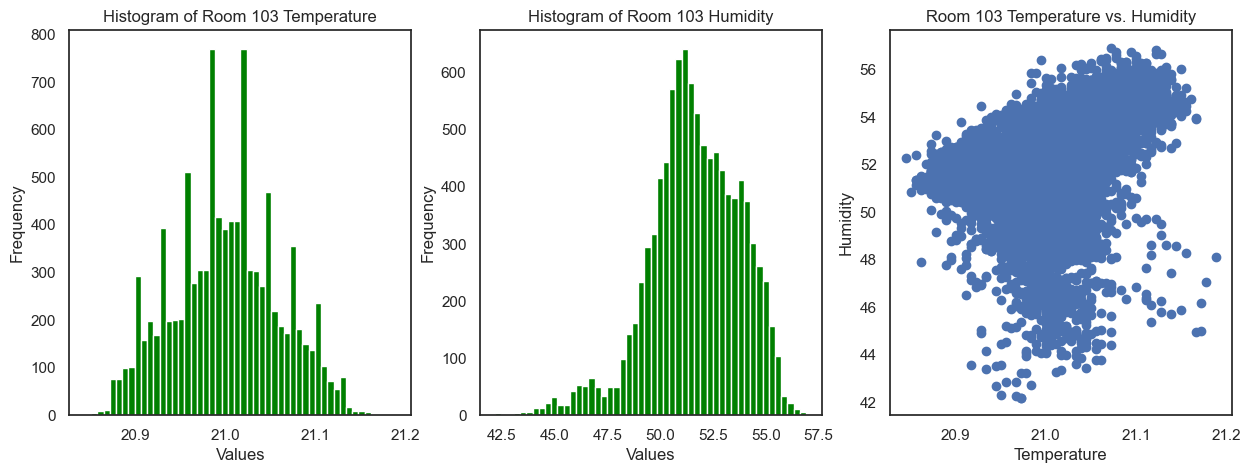

In [515]:
# Plot histograms and scatterplot for room 103

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# temperature
axs[0].hist(df.iloc[:, 3], bins=50, color='green')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Room 103 Temperature')
# humidity
axs[1].hist(df.iloc[:, 16], bins=50, color='green')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Room 103 Humidity')

# scatterplot
temp_col = df.iloc[:, 3]
humidity_col = df.iloc[:, 16]
axs[2].scatter(temp_col, humidity_col)
axs[2].set_xlabel('Temperature')
axs[2].set_ylabel('Humidity')
axs[2].set_title('Room 103 Temperature vs. Humidity')

plt.show()

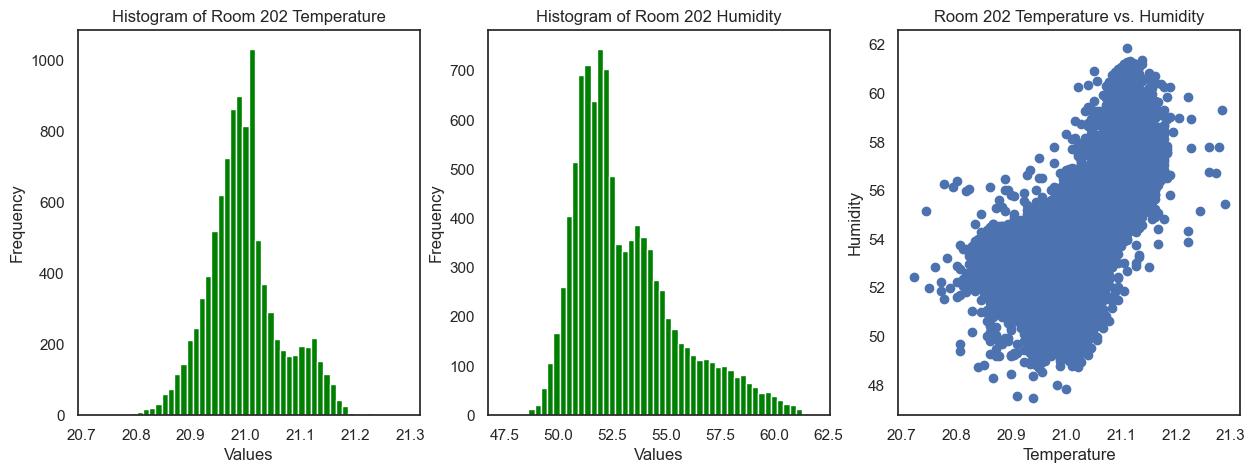

In [516]:
# Plot histograms and scatterplot for room 202

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# temperature
axs[0].hist(df.iloc[:, 8], bins=50, color='green')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Room 202 Temperature')
# humidity
axs[1].hist(df.iloc[:, 21], bins=50, color='green')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Room 202 Humidity')

# scatterplot
temp_col = df.iloc[:, 8]
humidity_col = df.iloc[:, 21]
axs[2].scatter(temp_col, humidity_col)
axs[2].set_xlabel('Temperature')
axs[2].set_ylabel('Humidity')
axs[2].set_title('Room 202 Temperature vs. Humidity')

# Show the subplots
plt.show()

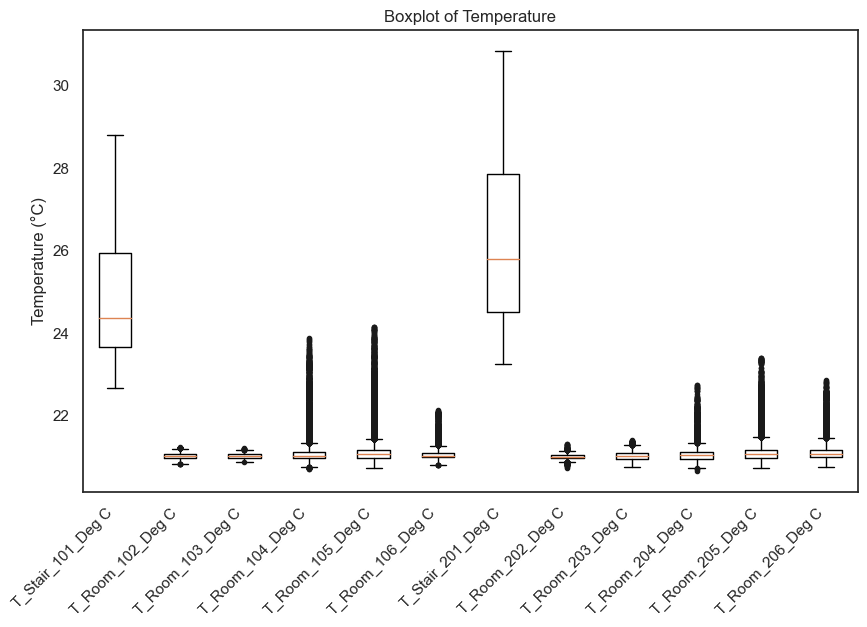

In [517]:
# Boxplot of temperature of each room
plt.show()
data_box = df.iloc[:, 1:13]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_box.values, sym='k.')
ax.set_xticklabels(data_box.columns, rotation=45, ha='right')
ax.set_title('Boxplot of Temperature')
ax.set_ylabel('Temperature (°C)')
plt.show()

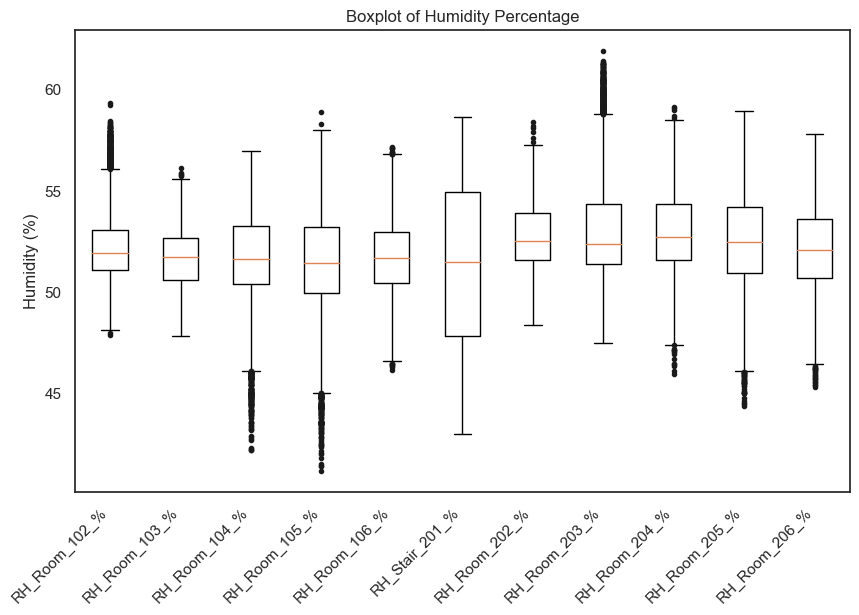

In [518]:
# Boxplot of humidity percentage of each room
data_box = df.iloc[:, 14:25]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_box.values, sym='k.')
ax.set_xticklabels(data_box.columns, rotation=45, ha='right')
ax.set_title('Boxplot of Humidity Percentage')
ax.set_ylabel('Humidity (%)')
plt.show()

C:\Users\sdeko\AppData\Local\Temp\ipykernel_11900\341148147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

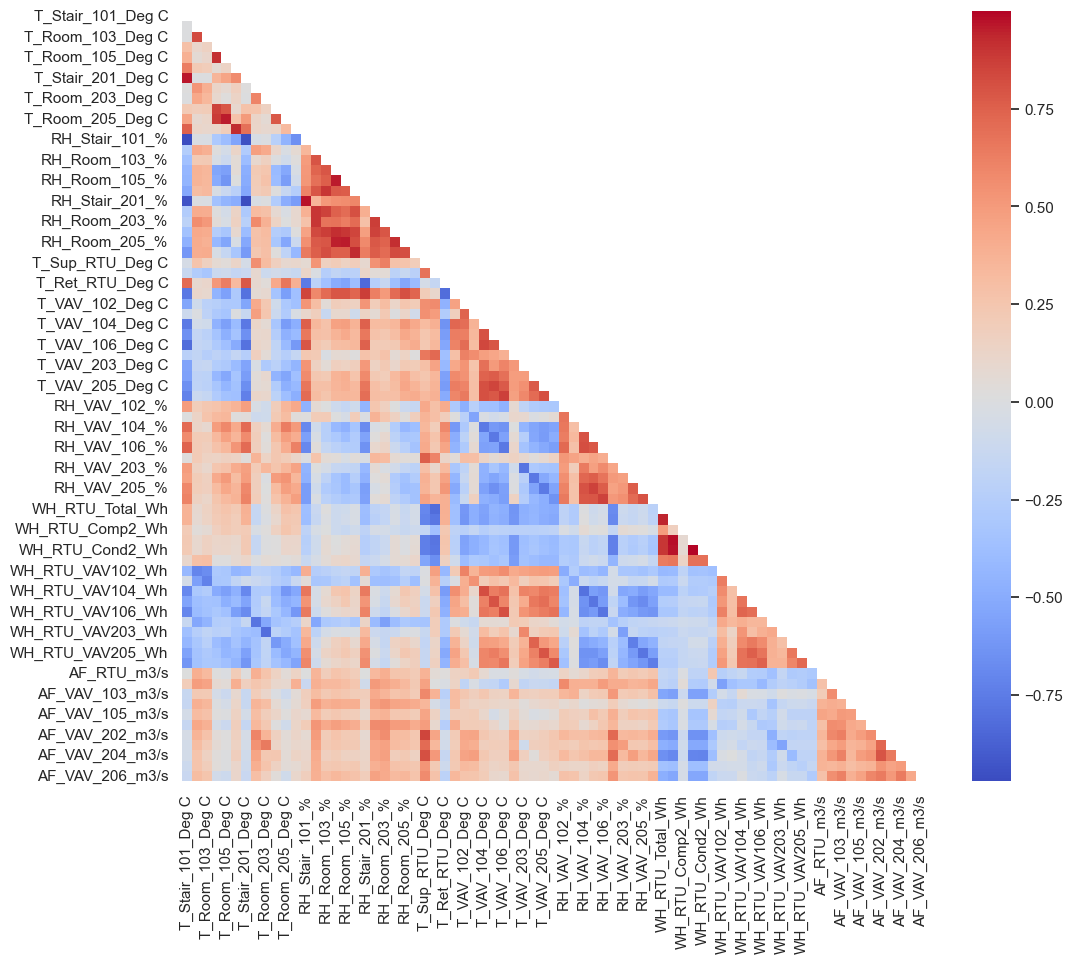

In [519]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.set(style='white')
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool_))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm')